In [1]:
import numpy as np
from scipy.special import beta
import matplotlib.pyplot as plt

C:\Users\mlapa\miniconda3\envs\basicds\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define a function that returns the upper bound that we derived in Eq. 1 of the blog post.
# Here, n is the sample size and lam is the multiplier lambda that tells you how much larger the new data point is
# compared to the maximum of the n previous data points.

def upper_bound(n, lam):
    return n * beta(n, lam + 1)

In [3]:
# Evaluate the upper bound when n = 25 for lam = 2 and 5.

n = 25

lam_vals = [2, 5]

for lam in lam_vals:
    print(upper_bound(n, lam))

0.0028490028490028487
7.01724839655874e-06


In [4]:
# Generate a figure that compares the upper bound in the log-concave case to the exact probability for two different
# Pareto distributions. 

n = 25
alpha1 = 1 
alpha2 = 2
num_points = 200 # The number of points in the grid for the plot.

lam = np.linspace(1, 10, num = num_points)
y1 = 1 / np.power(lam, alpha1) / (n + 1) # Result for Pareto distribution with alpha = 1.
y2 = 1 / np.power(lam, alpha2) / (n + 1) # Result for Pareto distribution with alpha = 2.
y3 = n * beta(n, lam + 1) # Upper bound for the log-concave distributions.

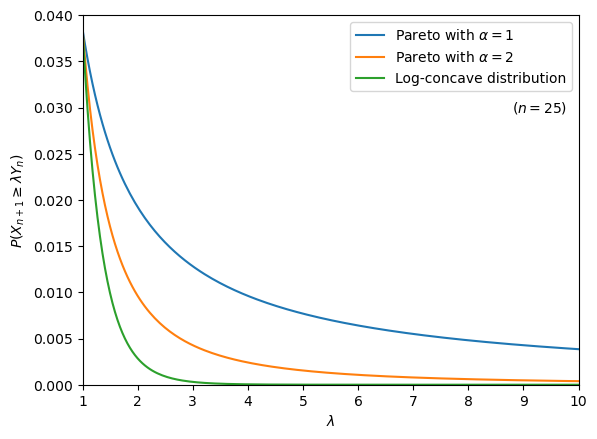

In [5]:
plt.plot(lam, y1, lam, y2, lam, y3)
plt.axis([1, 10, 0, 0.04])
plt.xlabel(r'$\lambda$')    
plt.ylabel(r'$P(X_{n+1} \geq \lambda Y_n)$')
plt.legend([r'Pareto with $\alpha = 1$', r'Pareto with $\alpha = 2$', r'Log-concave distribution'])
plt.text(8.8, 0.0295, r'$(n = 25)$')
plt.show()